In [ ]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [ ]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
# Machine learning
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# For data manipulation
import pandas as pd
import numpy as np

# To plot
import matplotlib.pyplot as plt
plt.style.use('seaborn-darkgrid')

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

In [ ]:
downloaded = drive.CreateFile({'id':'10ZDVQqb-rVX8m0YuPAmCS58DZGd_xbEm'}) 
downloaded.GetContentFile('TCS.NS.csv') 

In [ ]:
# Read the csv file using read_csv
# method of pandas
df = pd.read_csv('TCS.NS.csv')
df

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-21,2861.000000,2886.500000,2785.000000,2820.149902,2789.639404,2705195
1,2020-12-22,2834.000000,2883.649902,2818.649902,2872.500000,2841.423340,2881737
2,2020-12-23,2876.050049,2919.000000,2865.449951,2908.750000,2877.281006,2790988
3,2020-12-24,2909.000000,2921.350098,2883.199951,2909.350098,2877.874756,1807144
4,2020-12-28,2910.000000,2949.699951,2902.000000,2929.399902,2897.707764,2108994
...,...,...,...,...,...,...,...
241,2021-12-13,3650.000000,3662.000000,3601.699951,3609.649902,3609.649902,1883864
242,2021-12-14,3605.000000,3635.000000,3576.699951,3623.800049,3623.800049,1747007
243,2021-12-15,3620.000000,3623.000000,3558.149902,3570.350098,3570.350098,1603233
244,2021-12-16,3582.000000,3608.449951,3570.000000,3581.600098,3581.600098,2072320


In [ ]:
# Changes The Date column as index columns
df.index = pd.to_datetime(df['Date'])
df

# drop The original date column
df = df.drop(['Date'], axis='columns')
df

In [ ]:
# Create predictor variables
df['Open-Close'] = df.Open - df.Close
df['High-Low'] = df.High - df.Low

# Store all predictor variables in a variable X
X = df[['Open-Close', 'High-Low']]
X.head()

,Open-Close,High-Low
Date,,
2020-12-21,40.850098,101.500000
2020-12-22,-38.500000,65.000000
2020-12-23,-32.699951,53.550049
2020-12-24,-0.350098,38.150147
2020-12-28,-19.399902,47.699951


In [ ]:
# Target variables
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

array([1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0])

In [ ]:
split_percentage = 0.8
split = int(split_percentage*len(df))

# Train data set
X_train = X[:split]
y_train = y[:split]

# Test data set
X_test = X[split:]
y_test = y[split:]

In [ ]:
# Support vector classifier
cls = SVC().fit(X_train, y_train)

In [ ]:
df['Predicted_Signal'] = cls.predict(X)

In [ ]:
# Calculate daily returns
df['Return'] = df.Close.pct_change()

In [ ]:
# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.Predicted_Signal.shift(1)

In [ ]:
# Calculate Cumulutive returns
df['Cum_Ret'] = df['Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret
Date,,,,,,,,,,,,
2020-12-21,2861.000000,2886.500000,2785.000000,2820.149902,2789.639404,2705195,40.850098,101.500000,0,NaN,NaN,NaN
2020-12-22,2834.000000,2883.649902,2818.649902,2872.500000,2841.423340,2881737,-38.500000,65.000000,1,0.018563,0.000000,0.018563
2020-12-23,2876.050049,2919.000000,2865.449951,2908.750000,2877.281006,2790988,-32.699951,53.550049,1,0.012620,0.012620,0.031183
2020-12-24,2909.000000,2921.350098,2883.199951,2909.350098,2877.874756,1807144,-0.350098,38.150147,1,0.000206,0.000206,0.031389
2020-12-28,2910.000000,2949.699951,2902.000000,2929.399902,2897.707764,2108994,-19.399902,47.699951,1,0.006892,0.006892,0.038280
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-13,3650.000000,3662.000000,3601.699951,3609.649902,3609.649902,1883864,40.350098,60.300049,0,-0.007465,-0.007465,0.268771
2021-12-14,3605.000000,3635.000000,3576.699951,3623.800049,3623.800049,1747007,-18.800049,58.300049,1,0.003920,0.000000,0.272691
2021-12-15,3620.000000,3623.000000,3558.149902,3570.350098,3570.350098,1603233,49.649902,64.850098,0,-0.014750,-0.014750,0.257942


In [ ]:
# Plot Strategy Cumulative returns
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
df

,Open,High,Low,Close,Adj Close,Volume,Open-Close,High-Low,Predicted_Signal,Return,Strategy_Return,Cum_Ret,Cum_Strategy
Date,,,,,,,,,,,,,
2020-12-21,2861.000000,2886.500000,2785.000000,2820.149902,2789.639404,2705195,40.850098,101.500000,0,NaN,NaN,NaN,NaN
2020-12-22,2834.000000,2883.649902,2818.649902,2872.500000,2841.423340,2881737,-38.500000,65.000000,1,0.018563,0.000000,0.018563,0.000000
2020-12-23,2876.050049,2919.000000,2865.449951,2908.750000,2877.281006,2790988,-32.699951,53.550049,1,0.012620,0.012620,0.031183,0.012620
2020-12-24,2909.000000,2921.350098,2883.199951,2909.350098,2877.874756,1807144,-0.350098,38.150147,1,0.000206,0.000206,0.031389,0.012826
2020-12-28,2910.000000,2949.699951,2902.000000,2929.399902,2897.707764,2108994,-19.399902,47.699951,1,0.006892,0.006892,0.038280,0.019717
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-13,3650.000000,3662.000000,3601.699951,3609.649902,3609.649902,1883864,40.350098,60.300049,0,-0.007465,-0.007465,0.268771,0.361755
2021-12-14,3605.000000,3635.000000,3576.699951,3623.800049,3623.800049,1747007,-18.800049,58.300049,1,0.003920,0.000000,0.272691,0.361755
2021-12-15,3620.000000,3623.000000,3558.149902,3570.350098,3570.350098,1603233,49.649902,64.850098,0,-0.014750,-0.014750,0.257942,0.347006


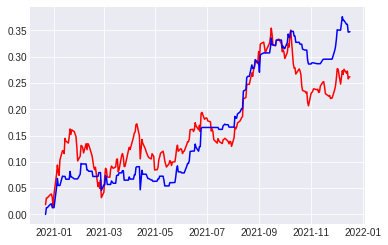

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='blue')